In [19]:
# подключение библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# установка стиля
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')

In [20]:
# чтение файла, который нужно предварительно загрузить в колаб (или можно вставить ссылку на файл в облаке)
df = pd.read_excel('solar_data_regression_en.xlsx', index_col = 0)
df

,Day,Solar_angle,Solar_time,Solar_flow,Сloudiness,Transparence,Temperature,Humidity,Wind_speed,Generation
Hour,,,,,,,,,,
12,269,-2.216887,14.379906,787.433789,0.000,75.996296,18.00,30.0,6.944444,10206.00
13,269,-2.216887,15.379906,644.730161,0.000,73.982707,18.00,30.0,6.944444,8143.80
14,269,-2.216887,16.379906,455.486706,0.000,69.487206,18.00,30.0,6.944444,5238.24
15,269,-2.216887,17.379906,232.600054,0.000,59.414224,17.50,31.0,6.527778,1984.08
16,269,-2.216887,18.379906,56.946636,0.000,0.000000,16.75,32.5,5.555556,141.96
...,...,...,...,...,...,...,...,...,...,...
5,1,-23.011637,7.185965,0.000000,95.000,0.000000,1.00,100.0,1.944444,0.00
6,1,-23.011637,8.185965,43.283738,81.250,4.926609,0.50,100.0,3.055556,10.08
7,1,-23.011637,9.185965,178.221903,88.125,10.213490,0.00,100.0,3.055556,168.84


In [21]:
df.drop('Transparence', axis=1, inplace=True)
df

,Day,Solar_angle,Solar_time,Solar_flow,Сloudiness,Temperature,Humidity,Wind_speed,Generation
Hour,,,,,,,,,
12,269,-2.216887,14.379906,787.433789,0.000,18.00,30.0,6.944444,10206.00
13,269,-2.216887,15.379906,644.730161,0.000,18.00,30.0,6.944444,8143.80
14,269,-2.216887,16.379906,455.486706,0.000,18.00,30.0,6.944444,5238.24
15,269,-2.216887,17.379906,232.600054,0.000,17.50,31.0,6.527778,1984.08
16,269,-2.216887,18.379906,56.946636,0.000,16.75,32.5,5.555556,141.96
...,...,...,...,...,...,...,...,...,...
5,1,-23.011637,7.185965,0.000000,95.000,1.00,100.0,1.944444,0.00
6,1,-23.011637,8.185965,43.283738,81.250,0.50,100.0,3.055556,10.08
7,1,-23.011637,9.185965,178.221903,88.125,0.00,100.0,3.055556,168.84


In [22]:
# проверьте наличие пропусков
df.isna().sum()

Day            0
Solar_angle    0
Solar_time     0
Solar_flow     0
Сloudiness     0
Temperature    0
Humidity       0
Wind_speed     0
Generation     0
dtype: int64

In [23]:
# удалите пропуски при наличии
df_proc = df.copy()
#df_proc = df_proc.dropna()

In [24]:
# проверьте, что все данные - числа (int или float)
df_proc.dtypes

Day              int64
Solar_angle    float64
Solar_time     float64
Solar_flow     float64
Сloudiness     float64
Temperature    float64
Humidity       float64
Wind_speed     float64
Generation     float64
dtype: object

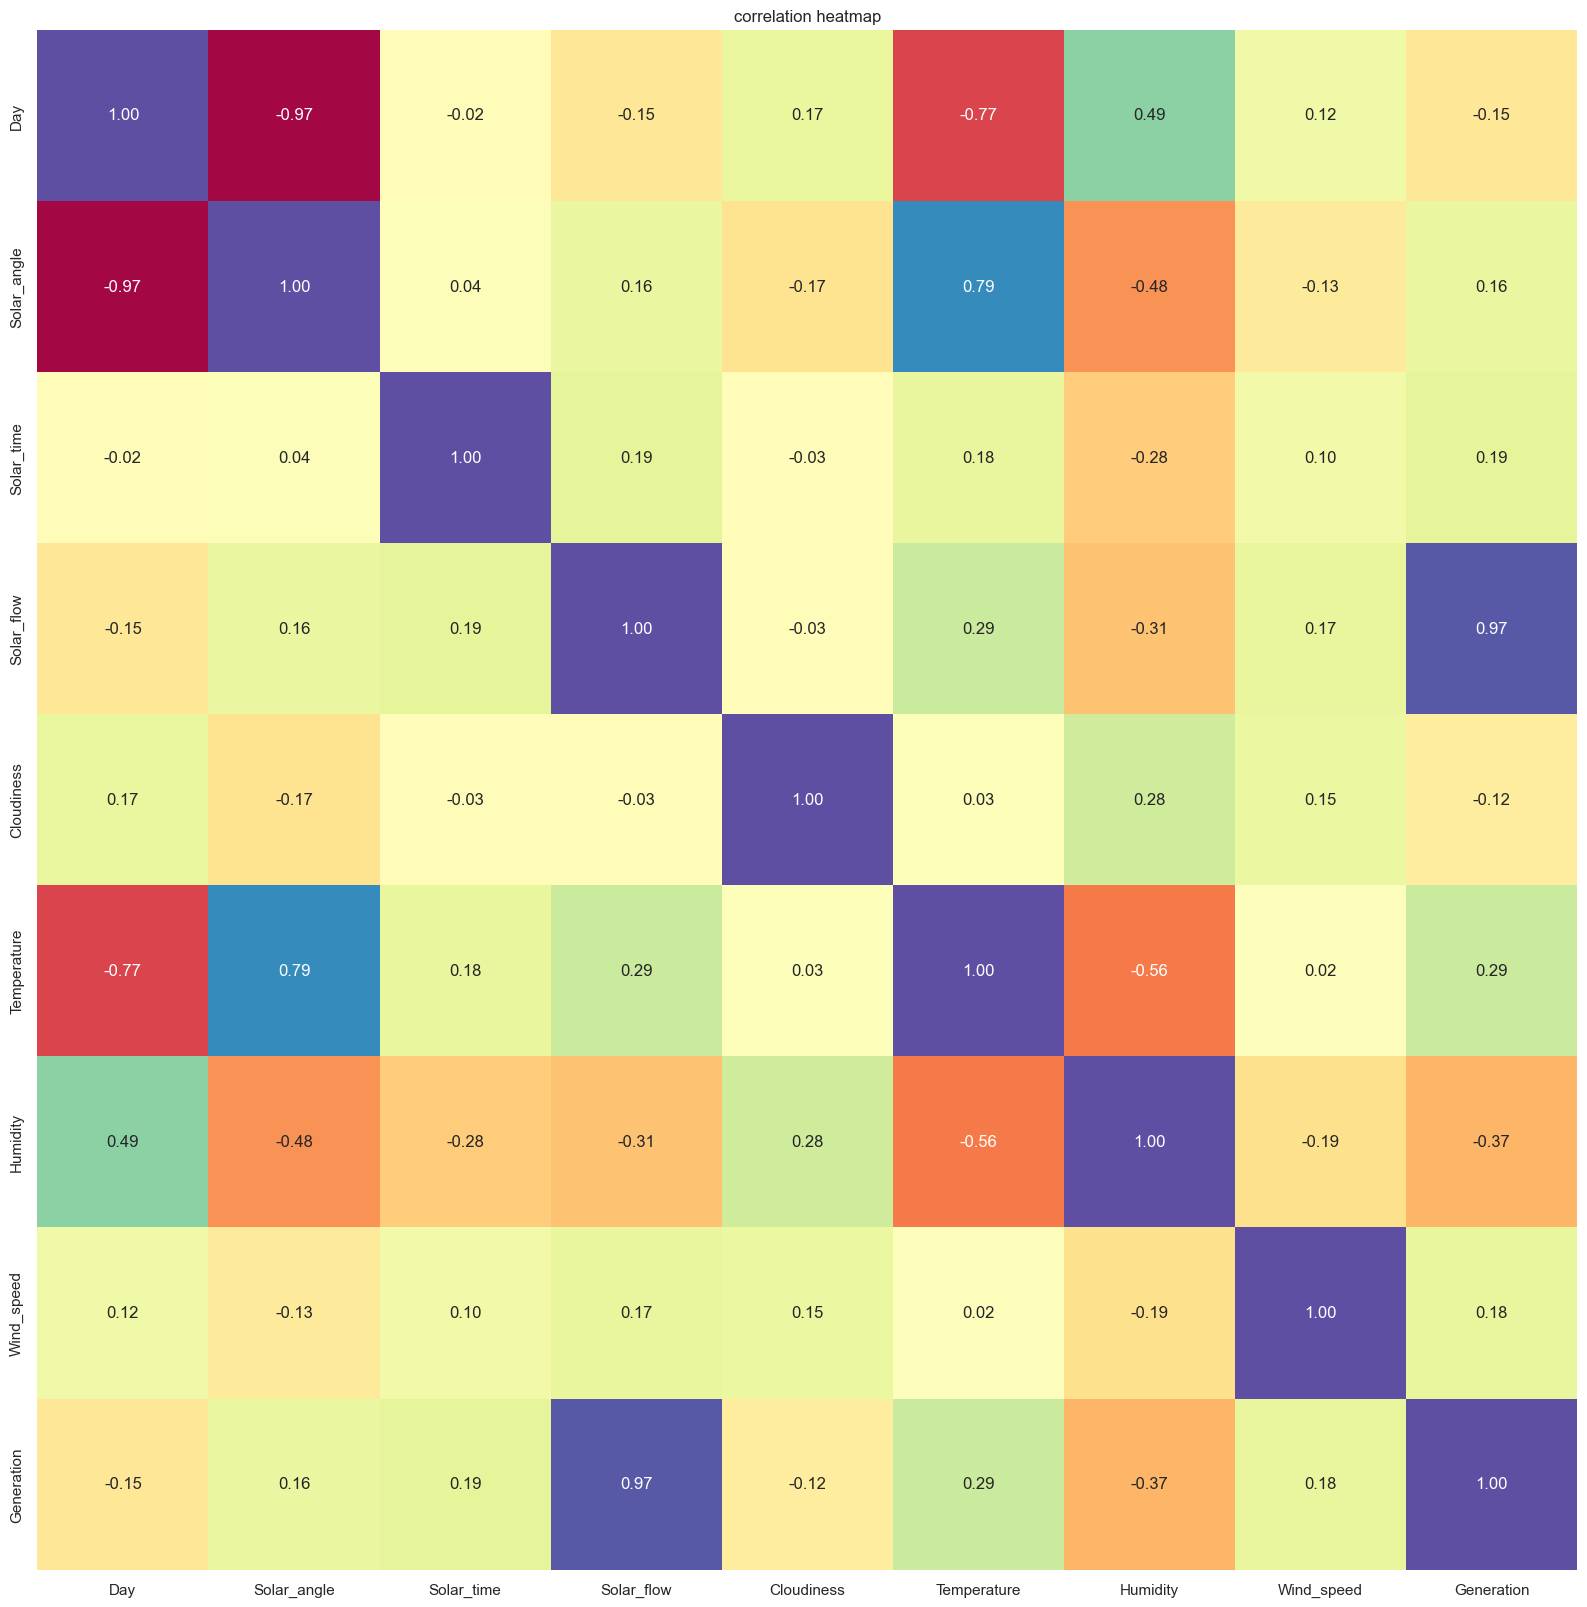

In [25]:
# постройте матрицу коэффициентов корреляции
plt.figure(figsize=(20, 20))
sns.set(font_scale = 1)
ax = plt.axes()
heat = sns.heatmap(df_proc.corr(method = 'spearman'), ax = ax, cmap = 'Spectral', vmax = 1, vmin = -1, square=True, annot=True, fmt = '.2f', cbar=False)
ax.set_title('correlation heatmap', fontsize = 12)
plt.show()

In [26]:
# подключаем модели машинного обучения
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# вспомогательные функции
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

In [27]:
# разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(df_proc.iloc[:, :-1], df_proc.iloc[:, -1], test_size=0.2)


      Day  Solar_angle  Solar_time  Solar_flow  Сloudiness  Temperature  \
Hour                                                                      
6     305   -15.363417    8.507516  195.753943       50.00     6.000000   
17    283    -7.724629   19.454334    0.000000       12.50    18.250000   
14    287    -9.229692   16.470851  313.601770       81.25    20.750000   
8     286    -8.857252   10.466967  652.401254       95.00    11.833333   
6     279    -6.182956    8.435393  347.946975       81.25    11.000000   
...   ...          ...         ...         ...         ...          ...   
3     272    -3.418991    5.397530    0.000000        0.00     5.200000   
14    278    -5.792670   16.430321  383.328557       81.25    14.750000   
6     322   -19.821090    8.476865  104.953533       25.00    -3.000000   
15    272    -3.418991   17.397530  207.850254        0.00    16.525000   
10    321   -19.602452   12.480428  566.709868        0.00     6.000000   

      Humidity  Wind_spe

In [28]:
# построение и применение классификатора
classifier = LogisticRegression() # здесь можно выбрать модель машинного обученния (LogisticRegression, KNeighborsClassifier, ...)
#classifier = RandomForestClassifier(n_estimators=20, max_depth=10)
lab_enc = preprocessing.LabelEncoder()
encoded_y_train = lab_enc.fit_transform(y_train)
classifier.fit(X_train, encoded_y_train)
y_train_pred = classifier.predict(X_train) # получение результатов сразу по всей обучающей выборке
y_test_pred = classifier.predict(X_test)   # получение результатов сразу по всей тестовой выборке

/Users/artyom/PycharmProjects/pythonProject/venv/venv3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# вывод результатов
print('Trainining results:')
print(classification_report(y_train.values, y_train_pred))
print('')
print('Test results:')
print(classification_report(y_test.values, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

Trainining results:


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets